### scilit-learn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

In [4]:
from sklearn.preprocessing import PolynomialFeatures  

In [5]:
poly = PolynomialFeatures(degree=2)

In [6]:
poly.fit(X)
X2 = poly.transform(X)

In [7]:
X2.shape

(100, 3)

In [8]:
X2[:5,:]

array([[ 1.        , -0.71894481,  0.51688163],
       [ 1.        ,  0.86658713,  0.75097326],
       [ 1.        , -1.1103181 ,  1.23280628],
       [ 1.        , -2.24714692,  5.04966927],
       [ 1.        ,  1.67745329,  2.81384954]])

In [9]:
X[:5,:]

array([[-0.71894481],
       [ 0.86658713],
       [-1.1103181 ],
       [-2.24714692],
       [ 1.67745329]])

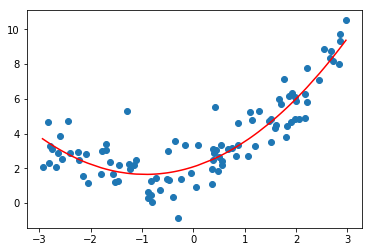

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.show()

In [15]:
lin_reg2.coef_

array([0.        , 0.94176915, 0.50780407])

In [16]:
lin_reg2.intercept_

2.0846929457351724

### 关于PolynomialFeatures

In [17]:
X = np.arange(1,11).reshape(-1,2)

In [18]:
X.shape

(5, 2)

In [19]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [23]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [24]:
X2.shape

(5, 6)

In [25]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [29]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)

In [30]:
X3.shape

(5, 10)

In [31]:
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

### Pipeline

In [32]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [34]:
poly_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [35]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

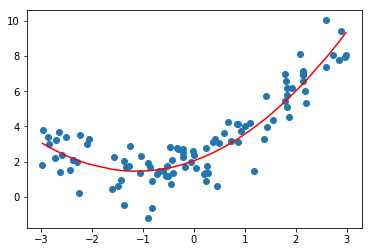

In [37]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()